In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd 
import matplotlib.pyplot as plt

In [7]:
fp = '/Users/adhyadagar/Downloads/IND_adm'
map_df = gpd.read_file(fp)

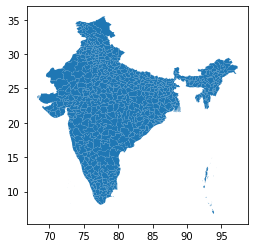

In [9]:
map_df.plot()

In [12]:
df = pd.read_excel('/Users/adhyadagar/Desktop/Labels.xlsx')

In [13]:
fp

'/Users/adhyadagar/Downloads/IND_adm'

In [14]:
map_df

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,105,IND,India,1,Andaman and Nicobar,1,Andaman Islands,District,District,None,None,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14..."
1,105,IND,India,1,Andaman and Nicobar,2,Nicobar Islands,District,District,None,None,"MULTIPOLYGON (((92.78778 9.24417, 92.78889 9.2..."
2,105,IND,India,2,Andhra Pradesh,3,Anantapur,District,District,None,"Anantpur, Ananthapur","POLYGON ((77.69000 15.17628, 77.69378 15.17347..."
3,105,IND,India,2,Andhra Pradesh,4,Chittoor,District,District,None,Chitoor|Chittor,"POLYGON ((78.47611 13.93680, 78.48208 13.93007..."
4,105,IND,India,2,Andhra Pradesh,5,Cuddapah,District,District,None,None,"POLYGON ((78.94612 15.19465, 78.95062 15.18535..."
...,...,...,...,...,...,...,...,...,...,...,...,...
589,105,IND,India,36,West Bengal,590,North 24 Parganas,District,District,None,None,"MULTIPOLYGON (((88.83472 21.60722, 88.83500 21..."
590,105,IND,India,36,West Bengal,591,Puruliya,District,District,None,None,"POLYGON ((85.88916 23.15176, 85.88641 23.15335..."
591,105,IND,India,36,West Bengal,592,South 24 Parganas,District,District,None,None,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21..."
592,105,IND,India,36,West Bengal,593,Uttar Dinajpur,District,District,None,None,"MULTIPOLYGON (((88.45847 25.59628, 88.45979 25..."


In [17]:
fp2 = '/Users/adhyadagar/Downloads/maps-master/Districts/Census_2011/2011_Dist.shp'
map_df2 = gpd.read_file(fp2)


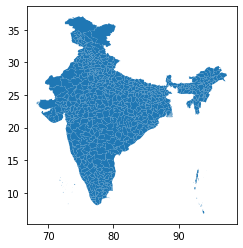

In [19]:
map_df2.plot()

In [20]:
map_df2

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."
...,...,...,...,...,...,...
636,Tapi,Gujarat,24,26,493,"POLYGON ((74.08573 21.55513, 74.08672 21.55515..."
637,Nicobar,Andaman & Nicobar Island,35,1,638,"MULTIPOLYGON (((93.84861 7.24051, 93.84870 7.2..."
638,South Andaman,Andaman & Nicobar Island,35,3,640,"MULTIPOLYGON (((92.69758 12.23961, 92.69778 12..."
639,North & Middle Andaman,Andaman & Nicobar Island,35,2,639,"MULTIPOLYGON (((92.89905 12.91512, 92.89905 12..."


In [21]:
map_df2['censuscode']

0      532
1      146
2      474
3      522
4      283
      ... 
636    493
637    638
638    640
639    639
640    587
Name: censuscode, Length: 641, dtype: int64

In [23]:
map_df2['District_Code'] = map_df2['censuscode']

In [25]:
data_df = pd.merge(map_df2, df, how='left', on='District_Code')

In [27]:
data_df['Duration_Label'].fillna(value='No data', inplace=True)

In [29]:
keys = list(data_df['Duration_Label'].unique())

In [30]:
color_range = list(np.linspace(0, 1, len(keys), endpoint=False))

In [34]:
import matplotlib.cm as cm
colors = [cm.tab20b(x) for x in color_range]
color_dict = dict(zip(keys, colors))
color_dict['No data'] = 'lightgray'

In [37]:
row_count = data_df['Duration_Label'].nunique()
ax_list = []
for i in range(row_count+1):
    ax_list.append('ax' + str(i+1))
ax_string = ','.join(ax_list)

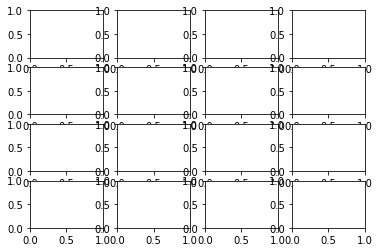

In [38]:
fig, (ax_string) = plt.subplots(row_count, 4)

(66.72479680849465, 98.87674485168903, 5.2398371413301845, 38.594383817860674)

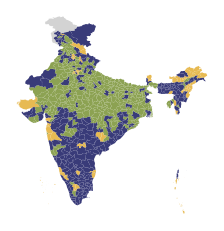

In [62]:
ax1 = plt.subplot2grid((row_count,4),(0,1), rowspan=row_count, colspan=10)
for index, row in data_df.iterrows():
    plot2 = data_df[data_df['censuscode'] == row['censuscode']].plot(color=color_dict[row['Duration_Label']], ax=ax1)
ax1.axis('off')


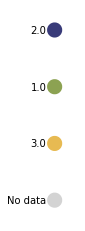

In [44]:
row_counter = 0
for i in data_df['Duration_Label'].unique(): 
    plt.subplot2grid((row_count,4),(row_counter,0))
    plt.pie([1],labels=[i],radius=0.4, colors=[color_dict[i]])
    plt.axis('off')
    row_counter += 1

In [45]:
variable = 'Duration_Label'

In [46]:
vmin, vmax = 120, 220


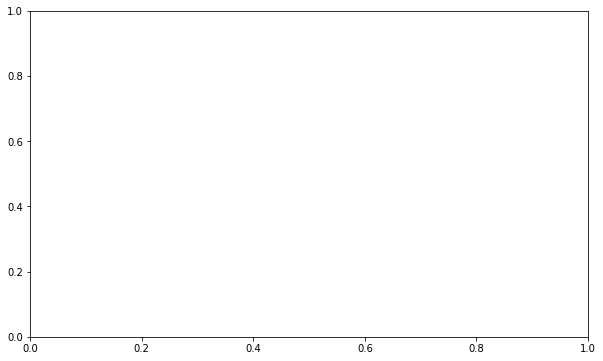

In [47]:
ig, ax = plt.subplots(1, figsize=(10, 6))

In [52]:
data_df.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

TypeError: '<' not supported between instances of 'str' and 'float'

In [61]:
ax1.plot2.savefig("map_exportt.png", dpi=300)


AttributeError: 'AxesSubplot' object has no attribute 'plot2'